In [7]:
from dataset import MNIST_dataset, Dataset, Data_Loader
from model import Model
from Linear import Dense
from optim import GradientDecent, MomentumGD,  Adam, StepLR
from activations import ReLU,Sigmoid
from loss import CrossEntropyLoss
from utils import save_weights, load_weights
from cnn import *
import time

In [8]:
# MNIST Dataset
batch_size = 1
dataset = MNIST_dataset("train.csv")
dataloader = Data_Loader(dataset, batch_size)

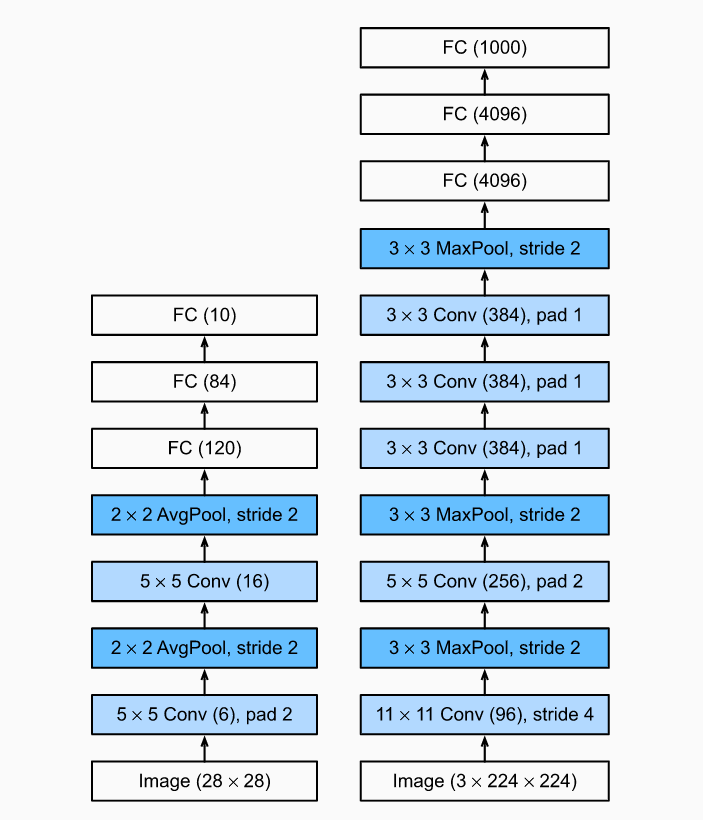

In [ ]:
# AlexNET
alexnet = Model()

alexnet.add(conv(1, 96, 11, padding=1, stride=4))
alexnet.add(ReLU())
alexnet.add(MaxPool2D(kernel_size=3))
alexnet.add(conv(96, 256, 5, padding=2))
alexnet.add(ReLU())
alexnet.add(MaxPool2D(kernel_size=3))
alexnet.add(conv(256, 384, 3, padding=1))
alexnet.add(ReLU())
alexnet.add(conv(384, 384, 3, padding=1))
alexnet.add(ReLU())
alexnet.add(conv(384, 256, 3, padding=1))
alexnet.add(ReLU())
alexnet.add(MaxPool2D(kernel_size=3))
alexnet.add(Flatten())
alexnet.add(Dense(6400, 4096))
alexnet.add(ReLU())
alexnet.add(Dense(4096, 4096))
alexnet.add(ReLU())
alexnet.add(Dense(4096, 10))

alexnet.set_loss(CrossEntropyLoss())

In [ ]:
optimizer = Adam(alexnet.parameters(), learning_rate = 0.01)
lr_schedular = StepLR(optimizer, step_size = 1, gamma=0.1)

In [ ]:
epochs = 10
for epoch in range(epochs):
    i = 0
    for image, label in dataloader:
        # if i == 1700:
        #     break
        image = image/255
        image = image.reshape(batch_size,1,28,28)
        i = i + 1
        print("Iteration no.", i)
        predicted = alexnet(image)
        loss = alexnet.loss(predicted, label)
        alexnet.backward()
        optimizer.step()
        print("loss= ", loss)
        #time.sleep(0.1)
        print("===========")

In [10]:
# LeNet
lenet = Model()

lenet.add(conv(1, 6, 5, padding=2))
lenet.add(Sigmoid())
lenet.add(MaxPool2D(kernel_size=2))
lenet.add(conv(6, 16, 5))
lenet.add(Sigmoid())
lenet.add(MaxPool2D(kernel_size=2))
lenet.add(Flatten())

lenet.add(Dense(16*16*5, 120))
lenet.add(Sigmoid())
lenet.add(Dense(120, 84))
lenet.add(Sigmoid())
lenet.add(Dense(84, 10))

lenet.set_loss(CrossEntropyLoss())

In [11]:
optimizer = Adam(lenet.parameters(), learning_rate = 0.01)
lr_schedular = StepLR(optimizer, step_size = 1, gamma=0.1)

In [12]:
epochs = 10
for epoch in range(epochs):
    i = 0
    for image, label in dataloader:
        # if i == 1700:
        #     break
        image = image/255
        image = image.reshape(batch_size,1,28,28)
        i = i + 1
        print(image.shape)
        print("Iteration no.", i)
        predicted = lenet(image)
        loss = lenet.loss(predicted, label)
        lenet.backward()
        optimizer.step()
        print("loss= ", loss)
        #time.sleep(0.1)
        print("===========")

(1, 1, 28, 28)
Iteration no. 1


ValueError: shapes (120,1280) and (400,1) not aligned: 1280 (dim 1) != 400 (dim 0)